<a href="https://colab.research.google.com/github/Vaishnavi741/STOCK-PREDICTION12/blob/main/Base_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
dir="/content/drive/MyDrive/Colab Notebooks/Aug31_Price_series (1).xlsx"
data=pd.read_excel(dir,index_col='time HHMMSS')
data.head()

,Spot price ltp NIFTY50,Price of Synthetic option derived future,price NIFTY23AUGFUT
time HHMMSS,,,
09:15:01,19375.55,19358.529510,19359.125
09:15:10,19361.80,19338.013578,19340.300
09:15:51,19358.50,19341.881400,19342.100
09:16:31,19374.25,19355.645595,19355.450
09:17:11,19374.25,19355.705598,19356.450


In [ ]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
data

,Spot price ltp NIFTY50,Price of Synthetic option derived future,price NIFTY23AUGFUT
time HHMMSS,,,
09:15:01,19375.55,19358.529510,19359.125
09:15:10,19361.80,19338.013578,19340.300
09:15:51,19358.50,19341.881400,19342.100
09:16:31,19374.25,19355.645595,19355.450
09:17:11,19374.25,19355.705598,19356.450
...,...,...,...
15:26:59,19262.45,19253.006319,19251.850
15:27:39,19272.85,19253.304164,19252.500
15:28:19,19283.15,19254.661953,19253.200


In [ ]:
data['Spot Price Past Values']=data['Spot price ltp NIFTY50'].shift(1)
data.dropna(inplace=True)

data

,Spot price ltp NIFTY50,Price of Synthetic option derived future,price NIFTY23AUGFUT,Spot Price Past Values
time HHMMSS,,,,
09:15:10,19361.80,19338.013578,19340.300,19375.55
09:15:51,19358.50,19341.881400,19342.100,19361.80
09:16:31,19374.25,19355.645595,19355.450,19358.50
09:17:11,19374.25,19355.705598,19356.450,19374.25
09:17:51,19375.15,19357.768122,19357.600,19374.25
...,...,...,...,...
15:26:59,19262.45,19253.006319,19251.850,19257.30
15:27:39,19272.85,19253.304164,19252.500,19262.45
15:28:19,19283.15,19254.661953,19253.200,19272.85


In [ ]:
X = data[['price NIFTY23AUGFUT','Price of Synthetic option derived future','Spot Price Past Values']].values
y = data['Spot price ltp NIFTY50'].values
print(X)
scaler=StandardScaler()
size = int(len(X) * 0.66)
x_train, x_test = X[0:size], X[size:len(X)]
y_train,y_test=y[0:size], y[size:len(X)]
history = [x for x in x_train]
predictions = list()
X_train_normalized = scaler.fit_transform(x_train)
X_test_normalized = scaler.transform(x_test)
#y_train_normalized=scaler.transform(y_train)
#y_test_normalized=scaler.transform(y_test)

[[19340.3        19338.01357848 19375.55      ]
 [19342.1        19341.88140031 19361.8       ]
 [19355.45       19355.64559487 19358.5       ]
 ...
 [19253.2        19254.66195256 19272.85      ]
 [19254.5        19254.31277906 19283.15      ]
 [19252.825      19254.03573935 19284.9       ]]


In [ ]:
regressor=LinearRegression()
model=regressor.fit(X_train_normalized,y_train)
regressor.intercept_,regressor.coef_

(19328.03555858311, array([ 6.18467431,  2.70059121, 15.82476214]))

In [ ]:
y_pred_train=regressor.predict(X_train_normalized)

In [ ]:

accuracy=model.score(X_train_normalized,y_train)
accuracy1=model.score(X_test_normalized,y_test)
print(accuracy,accuracy1)

0.9875712542084255 0.8891167022929527


In [ ]:
y_pred=regressor.predict(X_test_normalized)

In [ ]:
mean_squared_error(y_test, y_pred)

44.46957988259259

In [ ]:
mean_squared_error(y_train, y_pred_train)

7.603385936591198

In [ ]:
r2_score(y_train, y_pred_train)

0.9875712542084255

In [ ]:
r2_score(y_pred, y_test)

0.8514258674939215

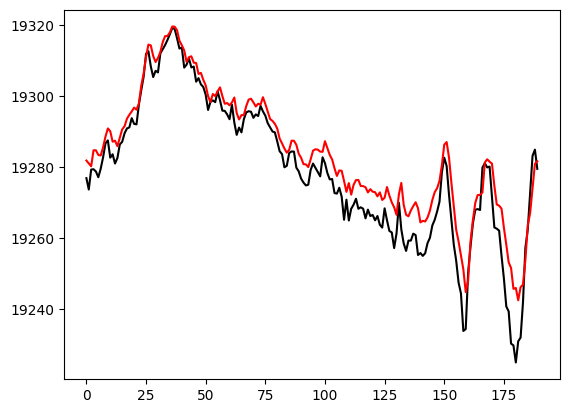

In [ ]:
plt.plot(y_test,color='black')
plt.plot(y_pred, color='red')
plt.show()

In [ ]:
#Linear Regression using Spot Price Past Values as Feature
X_new= data[['Spot Price Past Values']].values
y_new = data['Spot price ltp NIFTY50'].values
print(X_new)
scaler=StandardScaler()
size = int(len(X_new) * 0.66)
x_train_new, x_test_new = X_new[0:size], X_new[size:len(X_new)]
y_train_new,y_test_new=y_new[0:size], y_new[size:len(X_new)]
history = [x for x in x_train]
predictions = list()
X_train_normalized_new = scaler.fit_transform(x_train_new)
X_test_normalized_new = scaler.transform(x_test_new)

In [ ]:
regressor1=LinearRegression()
model1=regressor1.fit(X_train_normalized_new,y_train_new)
regressor1.intercept_,regressor1.coef_

(19328.03555858311, array([24.50733965]))

In [ ]:
y_pred_train_new=regressor1.predict(X_train_normalized_new)
y_pred_new=regressor1.predict(X_test_normalized_new)
print("MSE(Testing): ",mean_squared_error(y_test_new, y_pred_new))
print("MSE(Training): ",mean_squared_error(y_train_new, y_pred_train_new))
print("R2 Score(TR): ",r2_score(y_train_new, y_pred_train_new))
print("R2 Score(Testing): ",r2_score(y_pred_new, y_test_new))

MSE(Testing):  16.615100202703026
MSE(Training):  11.148405267224492
R2 Score(TR):  0.9817764485186841
R2 Score:  0.9578719970832648
